## In this notebook, the impact of changing the LJ PT on Background is studied
## The PT Choices are: [30, 40, 50, 60] GeV
## The following quantities are studied:
## - nLJ, nEGMLJ, nMuLJ
## - mJJ

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local 
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
import numpy as np

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,
Comm: tls://192.168.202.18:8786,Workers: 0
Dashboard: /user/scampbell10@crimson.ua.edu/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


2025-06-29 23:54:00,667 - distributed.client - ERROR - 
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/distributed/comm/core.py", line 342, in connect
    comm = await wait_for(
  File "/usr/local/lib/python3.10/site-packages/distributed/utils.py", line 1915, in wait_for
    return await asyncio.wait_for(fut, timeout)
  File "/usr/local/lib/python3.10/asyncio/tasks.py", line 445, in wait_for
    return fut.result()
  File "/usr/local/lib/python3.10/site-packages/distributed/comm/tcp.py", line 560, in connect
    convert_stream_closed_error(self, e)
  File "/usr/local/lib/python3.10/site-packages/distributed/comm/tcp.py", line 143, in convert_stream_closed_error
    raise CommClosedError(f"in {obj}: {exc.__class__.__name__}: {exc}") from exc
distributed.comm.core.CommClosedError: in <distributed.comm.tcp.TLSConnector object at 

In [11]:
## loading in the samples
samples = [
    #'TTJets',
    
    # 'QCD_Pt170To300',
   
    # 'QCD_Pt300To470',
    
    # 'QCD_Pt470To600',
    
    'QCD_Pt600To800',
   
    'QCD_Pt80To120',
]


## can set max_files=-1 to run over full statistics 
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=250, location_cfg="backgrounds.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor = processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ['base_LJPTGT30', 'base_LJPTGT40', 'base_LJPTGT50', 'base_LJPTGT60'] 
p = sidm_processor.SidmProcessor(
    channels,
    [
        "lj_base",
        'mu_lj_base',
        'egm_lj_base',
        
    ],
    unweighted_hist=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

[########################################] | 100% Completed | 35min  3.7s

In [12]:
path = './background'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)

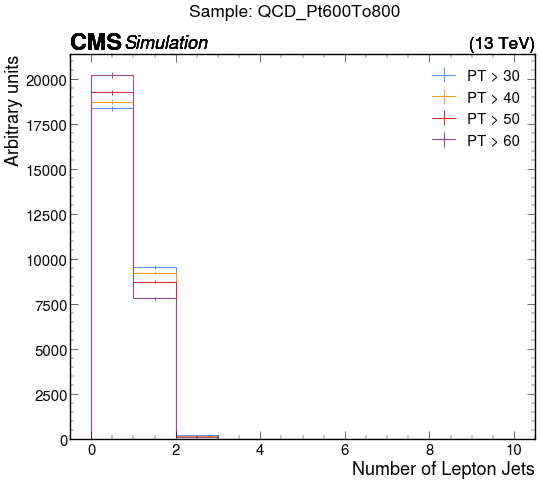

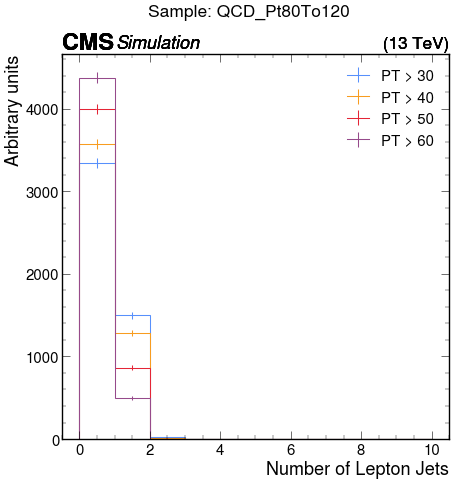

<Figure size 500x500 with 0 Axes>

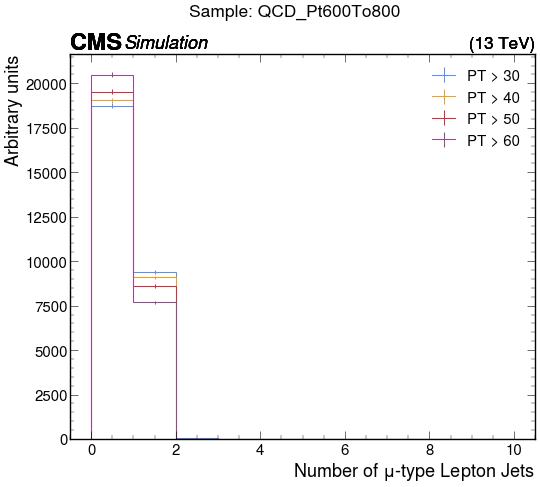

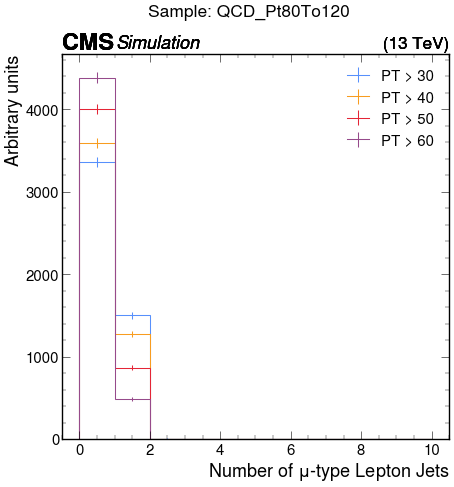

<Figure size 500x500 with 0 Axes>

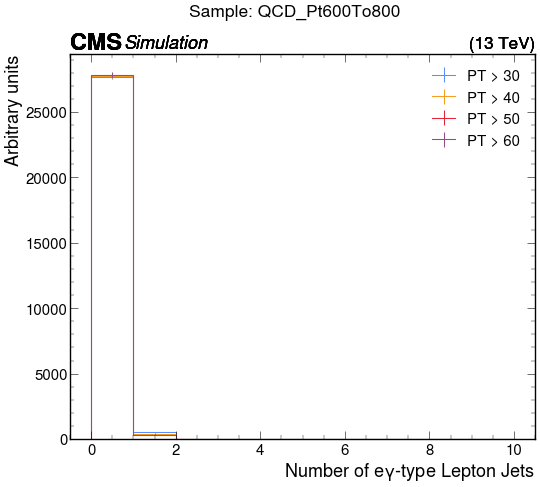

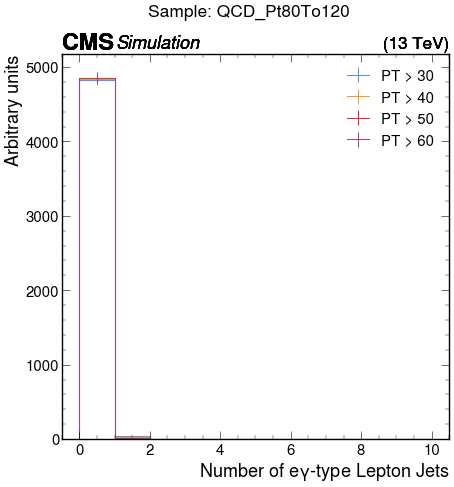

<Figure size 500x500 with 0 Axes>

In [13]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './Background_nLJ'

plt.subplots(1, nplots, figsize=(12, 10))
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
    
for i, sample in enumerate(samples):
    # mass = stringReplace(sample.split('_')[2]).split('G')[0]
    # decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Sample: {sample}', fontsize=25)
    plt.savefig(f'{path}/nLJ_{sample}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))   
for i, sample in enumerate(samples):
    # mass = stringReplace(sample.split('_')[2]).split('G')[0]
    # decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["mu_lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Sample: {sample}', fontsize=25)
    plt.savefig(f'{path}/nmuLJ_{sample}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
plt.subplots(1, nplots, figsize=(12, 10))    
for i, sample in enumerate(samples):
    # mass = stringReplace(sample.split('_')[2]).split('G')[0]
    # decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["egm_lj_n"][channels[3], :], density=False, label='PT > 60')
    
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    # # Add text in the bottom-left corner of the plot
    # ax.text(0.5, 0.05, f'{legend_entries[i]}', transform=ax.transAxes, 
    #         fontsize=25, color='k', ha='left', va='bottom')
    #plt.show()
    plt.suptitle(f'Sample: {sample}', fontsize=25)
    plt.savefig(f'{path}/negmLJ_{sample}_highPT.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

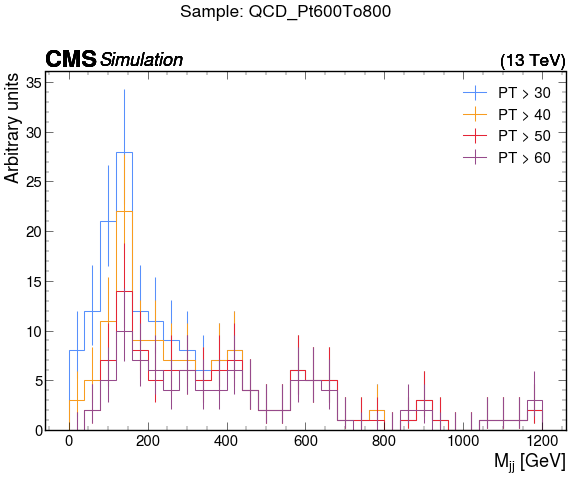

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


<Figure size 500x500 with 0 Axes>

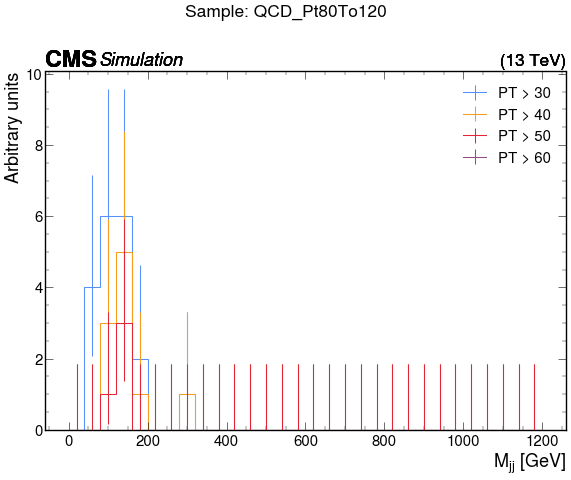

<Figure size 500x500 with 0 Axes>

In [14]:
nplots = 1

path = './invariantMassPlot-background'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    # mass = stringReplace(sample.split('_')[2]).split('G')[0]
    # decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[0], :], density=False, label='PT > 30')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[1], :], density=False, label='PT > 40')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[2], :], density=False, label='PT > 50')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[3], :], density=False, label='PT > 60')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[3], :], density=False, label='No PhoFull5x5SigmaIEtaIEtaCut + No PhoIsoWithEALinScalingCut + LooseID Electrons')
    # utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[4], :], density=False, label='LooseID Photons + LooseID Electrons')
    
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    #plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.suptitle(f'Sample: {sample}', fontsize=25)
    # Apply tight layout to ensure space for the legend
    plt.tight_layout()  # Adjust the right side to make room for the legend
    plt.savefig(f'{path}/plot_LJ_invariant_mass_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()